# Machine Learning

## Topic: Regression Analysis of Medical Insurance Costs in the U.S

***<font color='red'>NOTE :</font> This notebook is where the data was analyzed and the predictive models were built for the app. For App source code, click blue text below :*** <br><br>
> **[Source Code](https://github.com/ChrisF03/Streamlit-Apps/blob/main/app_3_insurance_regression/insurance-app.py)**

## Introduction

The United States spends significantly more on healthcare compared to other nations and such spending is expected to continue growing. That trend will increase the nation’s growing debt even further. This study will examine personal medical insurance costs in the United States, focusing on factors such as age, gender, body mass index, number of children, smoking habits, and residing region in the country. The medical insurance costs were evaluated on a yearly basis. We will begin by doing some exploratory analysis of the dataset and then building a multiple linear regression model in order to predict future prices of medical insurance. 

## Required Libraries ... 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

import warnings
import time

In [2]:
warnings.filterwarnings("ignore")

## Dataset : 

In [3]:
df = pd.read_csv('C:\\Users\\ferna\\OneDrive\\Desktop\\projects\\Machine Learning\\InsuranceDataset.csv')

# Exploratory Analysis 

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
label_encoder = preprocessing.LabelEncoder()
encoded_df = df.apply(label_encoder.fit_transform)
encoded_df

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254
...,...,...,...,...,...,...,...
1333,32,1,276,3,0,1,746
1334,0,0,302,0,0,0,118
1335,0,0,422,0,0,2,32
1336,3,0,146,0,0,3,91


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Lets take a closer look at the distributions of these continuous variables. 

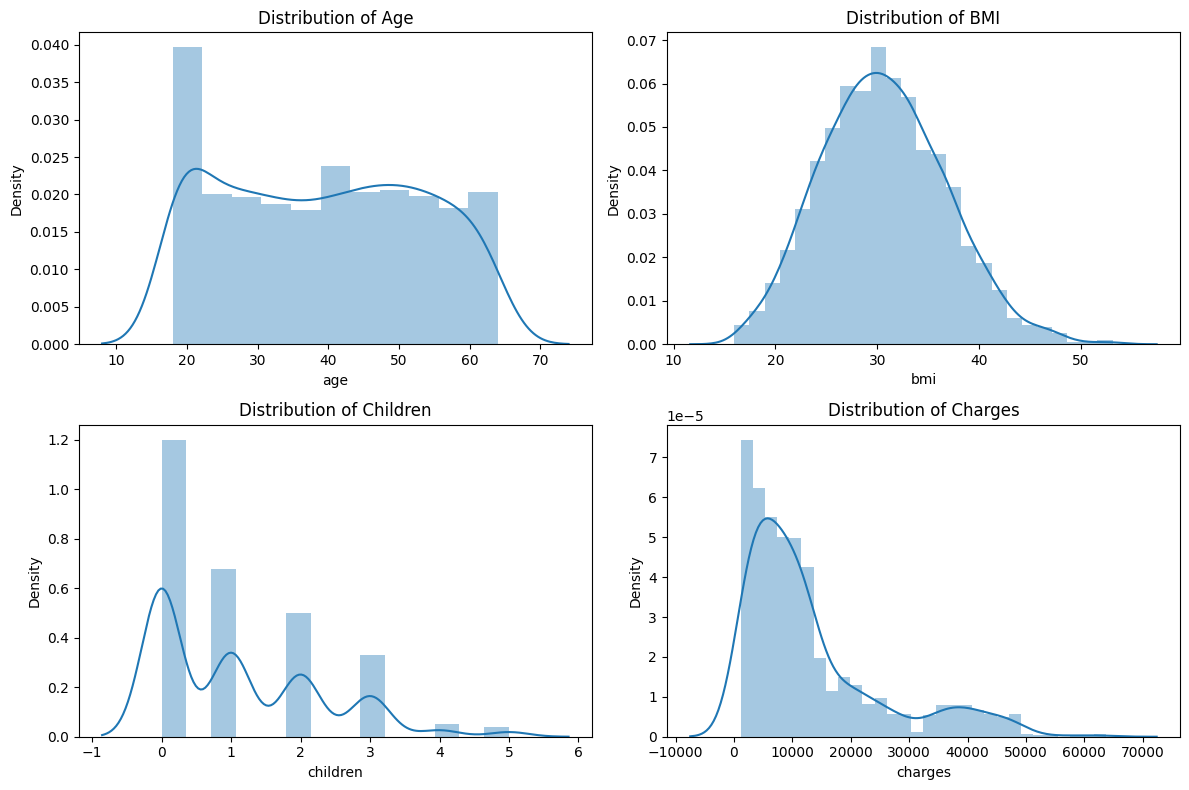

In [9]:
fig = plt.figure(figsize=(12,8))
grid = fig.add_gridspec(2,2)

ax0 = fig.add_subplot(grid[0,0])
sns.distplot(df['age'], kde = True)
plt.title('Distribution of Age')

ax1 = fig.add_subplot(grid[0,1])
sns.distplot(df['bmi'], kde = True)
plt.title('Distribution of BMI')

ax2 = fig.add_subplot(grid[1,0])
sns.distplot(df['children'], kde = True)
plt.title('Distribution of Children')

ax3 = fig.add_subplot(grid[1,1])
sns.distplot(df['charges'], kde = True)
plt.title('Distribution of Charges')

plt.tight_layout()

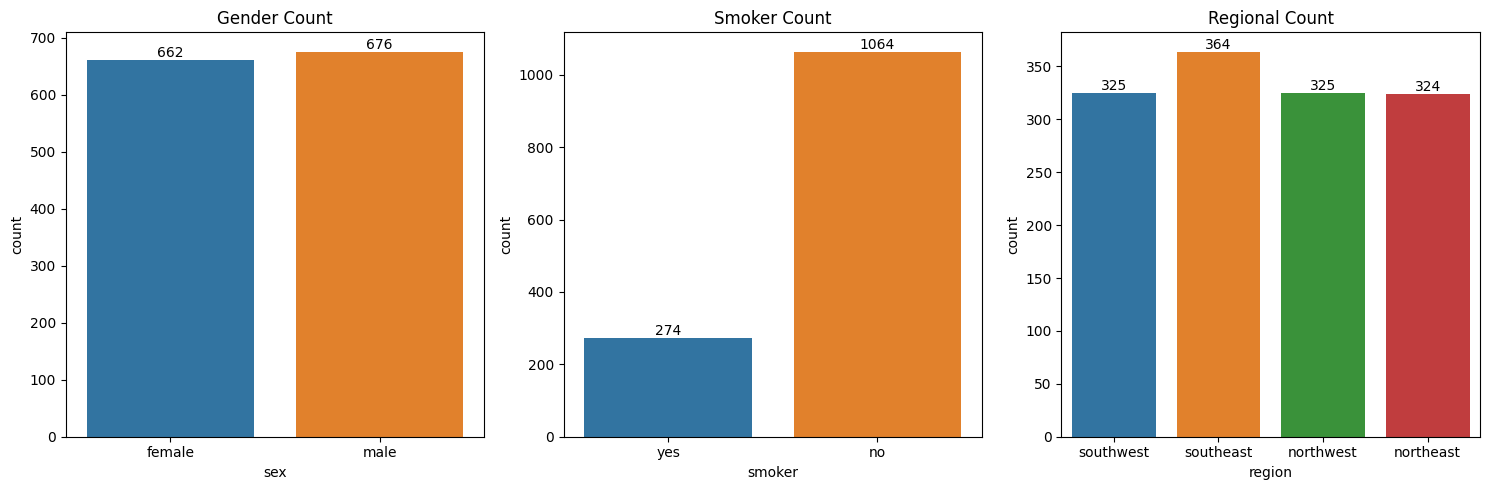

In [10]:
fig = plt.figure(figsize=(15,5))
grid = fig.add_gridspec(1,3)

ax0 = fig.add_subplot(grid[0,0])
sns.countplot(data=df, x='sex', ax=ax0)
ax0.set_title('Gender Count')
ax0.bar_label(ax0.containers[0])

ax1 = fig.add_subplot(grid[0,1])
sns.countplot(data=df, x="smoker", ax=ax1)
ax1.set_title('Smoker Count')
ax1.bar_label(ax1.containers[0])

ax2 = fig.add_subplot(grid[0,2])
sns.countplot(data=df, x="region", ax=ax2)
ax2.set_title('Regional Count')
ax2.bar_label(ax2.containers[0])

plt.tight_layout()

* Men make up a slight majority of our dataset with a total of 676 participants compared to 662 women. 
* Most of our participants are NOT smokers. 
* Most of our participants reside in the southeast region of the U.S, with a total of 364, followed by 325 residing in both the southwest and northwest and 324 in the northeast. 

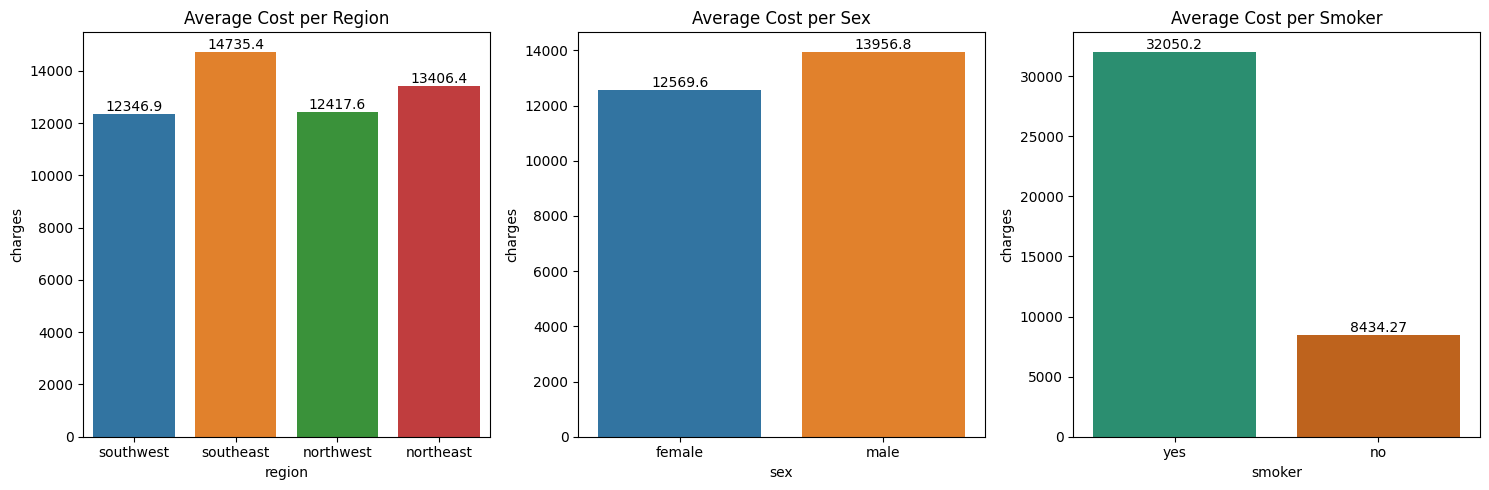

In [11]:
fig = plt.figure(figsize=(15,5))
grid = fig.add_gridspec(1,3)

ax0 = fig.add_subplot(grid[0,0])
sns.barplot(x='region', y='charges', data=df, errorbar=None, ax=ax0)
ax0.set_title('Average Cost per Region')
ax0.bar_label(ax0.containers[0])

ax1 = fig.add_subplot(grid[0,1])
sns.barplot(x='sex', y='charges', data=df, errorbar=None, ax=ax1)
ax1.set_title('Average Cost per Sex')
ax1.bar_label(ax1.containers[0])

ax2 = fig.add_subplot(grid[0,2])
sns.barplot(x ='smoker', y ='charges', data=df, errorbar=None, palette='Dark2', ax=ax2)
ax2.set_title('Average Cost per Smoker')
ax2.bar_label(ax2.containers[0])

plt.tight_layout()

* Americans in the southeast tend to pay more for medical insurance, paying an average of \$14,735.
* Men pay an average of nearly \$1,400 more than women. 
* Smokers pay almost 4 times the amounts of non-smokers, at an astounding rate of \$32,050.

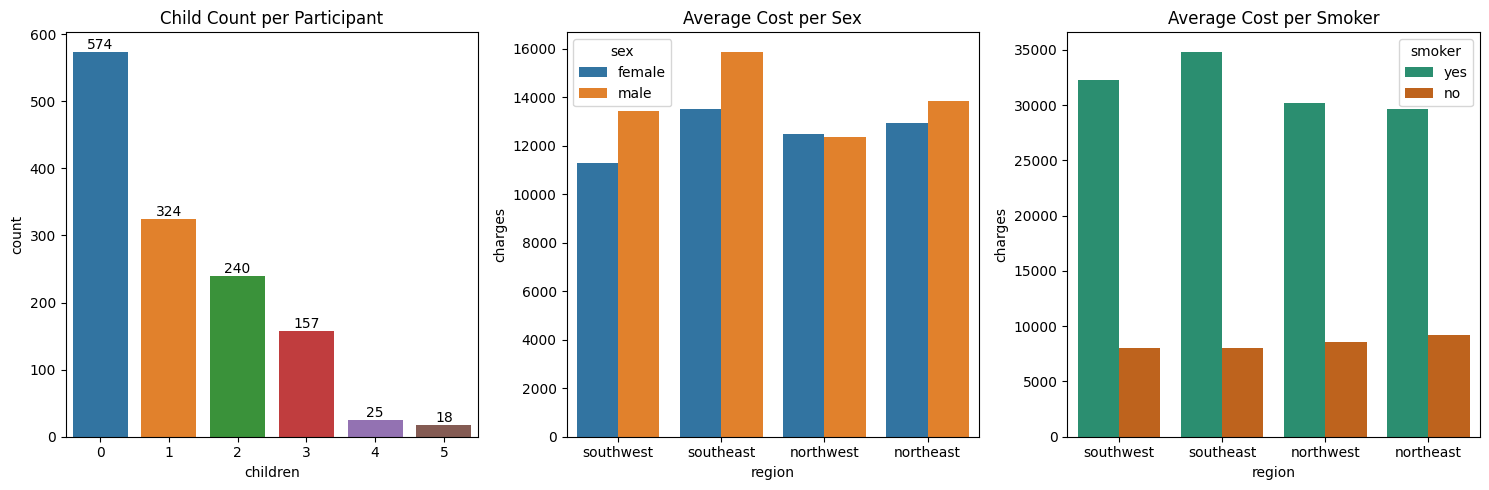

In [12]:
fig = plt.figure(figsize=(15,5))
grid = fig.add_gridspec(1,3)

ax0 = fig.add_subplot(grid[0,0])
sns.countplot(x='children', data=df, ax=ax0)
ax0.set_title('Child Count per Participant')
ax0.bar_label(ax0.containers[0])

ax1 = fig.add_subplot(grid[0,1])
sns.barplot(x='region', y='charges', hue='sex', data=df, errorbar=None, ax=ax1)
ax1.set_title('Average Cost per Sex')

ax2 = fig.add_subplot(grid[0,2])
sns.barplot(x ='region', y ='charges', hue='smoker', data=df, errorbar=None, palette='Dark2', ax=ax2)
ax2.set_title('Average Cost per Smoker')

plt.tight_layout()

* Most of our participants have 1-3 kids, and there are many more participants with no kids than there are with 4 or 5. 
* As previously stated, men pay more than women and this is across every region except the northwest where men pay slightly less.
* Smokers also pay overwhelmingly more than non-smokers, regardless of region. 

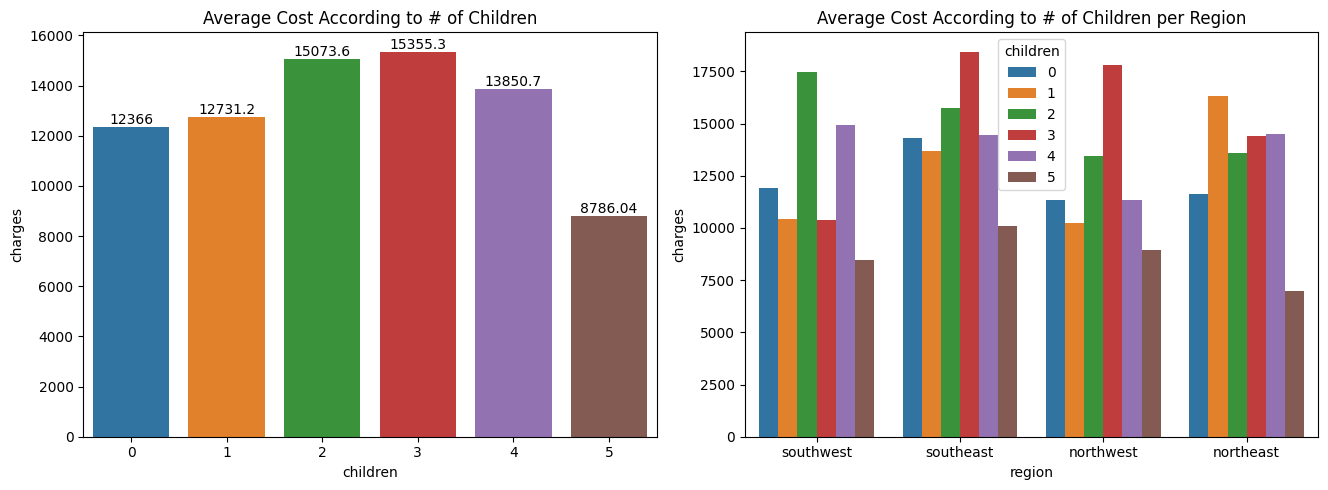

In [13]:
fig = plt.figure(figsize=(20,5))
grid = fig.add_gridspec(1,3)

ax0 = fig.add_subplot(grid[0,0])
sns.barplot(x='children', y='charges', data=df, errorbar=None, ax=ax0)
ax0.set_title('Average Cost According to # of Children')
ax0.bar_label(ax0.containers[0])

ax1 = fig.add_subplot(grid[0,1])
sns.barplot(x='region', y='charges', hue='children', data=df, errorbar=None, ax=ax1)
ax1.set_title('Average Cost According to # of Children per Region')


plt.tight_layout()

* As suspected, participants with 2-3 kids pay more for insurance than those with less or more, as these households are much more common. 
* People with 2-3 kids pay more in 3 out of the 4 regions represented in our dataset, with the exception being the northeast where households with 1 child pay more. 

# Dummy Variables

In [14]:
sex = pd.get_dummies(df['sex'],drop_first=True)
df['male'] = sex
df.head(3)

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.90,0,yes,southwest,16884.9240,0
1,18,male,33.77,1,no,southeast,1725.5523,1
2,28,male,33.00,3,no,southeast,4449.4620,1


In [15]:
smoker = pd.get_dummies(df['smoker'],drop_first=True)
df['yes'] = smoker
df.head(3)

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.90,0,yes,southwest,16884.9240,0,1
1,18,male,33.77,1,no,southeast,1725.5523,1,0
2,28,male,33.00,3,no,southeast,4449.4620,1,0


In [16]:
regions = pd.get_dummies(df['region'],drop_first=True)
df = pd.concat([df,regions],axis = 1)
df.head(3)

,age,sex,bmi,children,smoker,region,charges,male,yes,northwest,southeast,southwest
0,19,female,27.90,0,yes,southwest,16884.9240,0,1,0,0,1
1,18,male,33.77,1,no,southeast,1725.5523,1,0,0,1,0
2,28,male,33.00,3,no,southeast,4449.4620,1,0,0,1,0


In [17]:
df = df.drop(['sex','smoker','region'],axis = 1)
df.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [18]:
df.rename(columns={'yes':'smoker'}, inplace=True)
df.head(3)

,age,bmi,children,charges,male,smoker,northwest,southeast,southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,1,0


# Split and Scale

In [19]:
X = df.drop(['charges'],axis = 1)
Y = df['charges']

In [20]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(X)
X = pd.DataFrame(standard_df, columns=X.columns)
X.head(3)

,age,bmi,children,male,smoker,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,0.989591,-0.507463,-0.566418,1.635795,-0.566418


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [22]:
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (1070, 8)
The shape of X_test is: (268, 8)
The shape of Y_train is: (1070,)
The shape of Y_test is: (268,)


# Building Our Models

For this project I will focus on five regression algorithms from the sklearn library : 
>* Linear Regression
>* Ridge Regression
>* Lasso Regression 
>* ElasticNet Regression and
>* Random Forest Regressor

## Linear Regression

In [23]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
r2 = lr.score(X_test,Y_test)
print('Linear Regression Accuracy =',r2)

Linear Regression Accuracy = 0.7999876970680433


In [24]:
lr_params = {'fit_intercept':[True,False],
             'copy_X':[True,False],
             'n_jobs':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
             'positive':[True,False]}

linreg_cv = GridSearchCV(lr,lr_params,cv=5,scoring='r2')
linreg_cv.fit(X_train, Y_train)
print("Best Parameters :",linreg_cv.best_params_)

Best Parameters : {'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'positive': False}


In [25]:
y_predict=linreg_cv.best_estimator_.predict(X_test)

print("Tuned Linear Regression Model Score:", 
     (r2_score(Y_test, y_predict)*100).round(2),'%')

Tuned Linear Regression Model Score: 80.0 %


Our tuned Linear Regression model produced a satisfactory score of 80 %. Now lets see which features were the most important in this model. 

### Feature Importance 

In [26]:
importances = linreg_cv.best_estimator_.coef_
feature_names = list(X.columns)

sorted_importances, sorted_feature_names = zip(*sorted(zip(importances, feature_names), reverse=True))

feat = {'feature':sorted_feature_names, 'importance':sorted_importances}
feature_importance = pd.DataFrame.from_dict(feat)
feature_importance

,feature,importance
0,smoker,9525.643073
1,age,3563.149700
2,bmi,2047.998287
3,children,526.495121
4,male,-7.731441
5,northwest,-111.554037
6,southwest,-326.750323
7,southeast,-406.422225


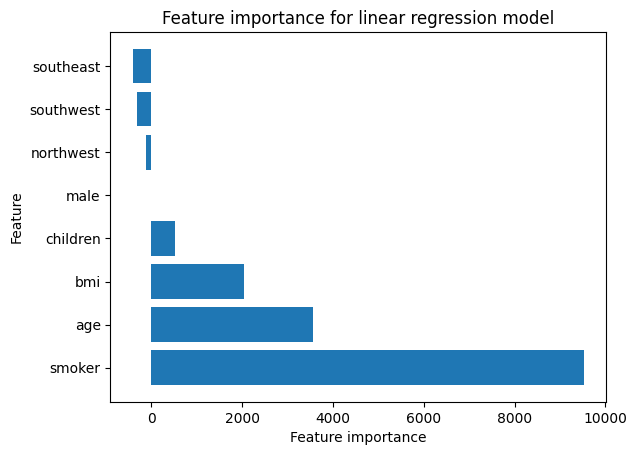

In [27]:
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature importance for linear regression model')
plt.show()

## Ridge Regression

In [28]:
ridge = Ridge()
ridge.fit(X_train,Y_train)
r2 = ridge.score(X_test,Y_test)
print('Ridge Regression Accuracy =',r2)

Ridge Regression Accuracy = 0.7999172155782595


In [29]:
r_params = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,10.0],
            'fit_intercept':[True,False], 
            'copy_X':[True,False], 
            'max_iter':[1,2,3,4,5,6,7,8,9,10],
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'], 
            'positive':[True,False]}

ridge_cv = GridSearchCV(ridge,r_params,cv=5,scoring='r2')
ridge_cv.fit(X_train, Y_train)
print("Best Parameters :",ridge_cv.best_params_)

Best Parameters : {'alpha': 0.3, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10, 'positive': False, 'solver': 'sag'}


In [30]:
y_predict=ridge_cv.best_estimator_.predict(X_test)

print("Tuned Ridge Regression Model Accuracy:", 
     (r2_score(Y_test, y_predict)*100).round(2),'%')

Tuned Ridge Regression Model Accuracy: 79.83 %


### Feature Importance

In [31]:
importances = ridge_cv.best_estimator_.coef_
feature_names = list(X.columns)

sorted_importances, sorted_feature_names = zip(*sorted(zip(importances, feature_names), reverse=True))

feat = {'feature':sorted_feature_names, 'importance':sorted_importances}
feature_importance = pd.DataFrame.from_dict(feat)
feature_importance

,feature,importance
0,smoker,9379.478327
1,age,3504.084186
2,bmi,1965.228154
3,children,384.182914
4,male,-33.974670
5,northwest,-146.416496
6,southeast,-243.872662
7,southwest,-432.220923


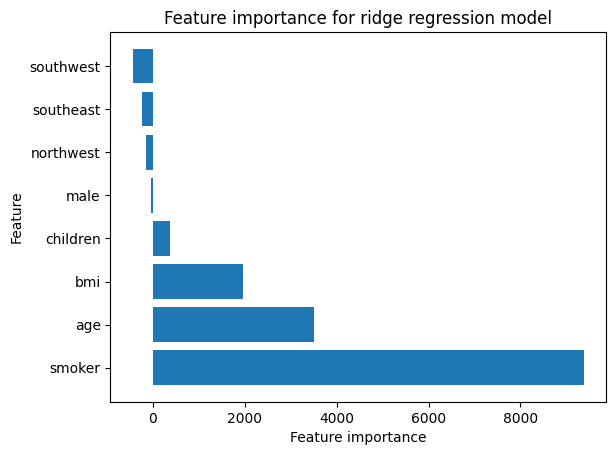

In [32]:
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature importance for ridge regression model')
plt.show()

## Lasso Regression 

In [33]:
lasso = Lasso()
lasso.fit(X_train,Y_train)
r2 = lasso.score(X_test,Y_test)
print('Lasso Regression Accuracy =',r2)

Lasso Regression Accuracy = 0.7999599770474672


In [34]:
lasso_params = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,10.0],
                'fit_intercept':[True,False], 
                'precompute':[True,False],
                'copy_X':[True,False],
                'selection':['cyclic','random'], 
                'positive':[True,False]}

lasso_cv = GridSearchCV(lasso,lasso_params,cv=5,scoring='r2')
lasso_cv.fit(X_train, Y_train)
print("Best Parameters :",lasso_cv.best_params_)

Best Parameters : {'alpha': 10.0, 'copy_X': False, 'fit_intercept': True, 'positive': False, 'precompute': False, 'selection': 'random'}


In [35]:
y_predict=lasso_cv.best_estimator_.predict(X_test)

print("Tuned Lasso Regression Model Accuracy:", 
     (r2_score(Y_test, y_predict)*100).round(2),'%')

Tuned Lasso Regression Model Accuracy: 79.97 %


### Feature Importance

In [36]:
importances = lasso_cv.best_estimator_.coef_
feature_names = list(X.columns)

sorted_importances, sorted_feature_names = zip(*sorted(zip(importances, feature_names), reverse=True))

feat = {'feature':sorted_feature_names, 'importance':sorted_importances}
feature_importance = pd.DataFrame.from_dict(feat)
feature_importance

,feature,importance
0,smoker,9514.941341
1,age,3555.925069
2,bmi,2033.749363
3,children,516.713398
4,male,-0.000000
5,northwest,-80.294830
6,southwest,-294.321585
7,southeast,-369.719938


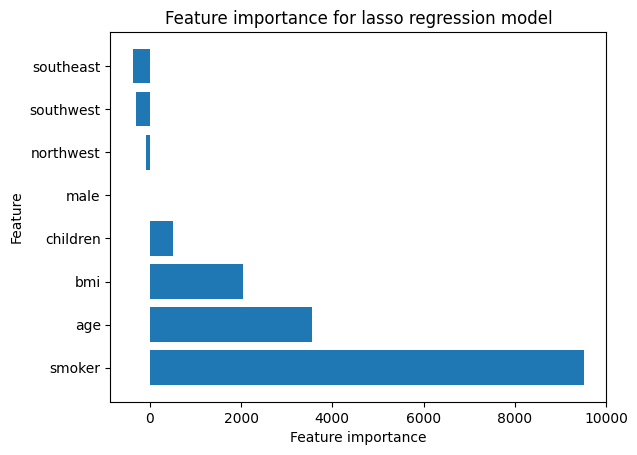

In [37]:
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature importance for lasso regression model')
plt.show()

## ElasticNet Regression 

In [38]:
en = ElasticNet()
en.fit(X_train,Y_train)
r2 = en.score(X_test,Y_test)
print('ElasticNet Regression Accuracy =',r2)

ElasticNet Regression Accuracy = 0.6908458023365647


In [39]:
en_params = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,10.0],
             'l1_ratio':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
             'fit_intercept':[True,False],
             'precompute':[True,False],
             'copy_X':[True,False],
             'selection':['cyclic','random'], 
             'positive':[True,False]}

en_cv = GridSearchCV(en,en_params,cv=5,scoring='r2')
en_cv.fit(X_train, Y_train)
print("Best Parameters :",en_cv.best_params_)

Best Parameters : {'alpha': 10.0, 'copy_X': False, 'fit_intercept': True, 'l1_ratio': 1.0, 'positive': False, 'precompute': False, 'selection': 'random'}


In [40]:
y_predict=en_cv.best_estimator_.predict(X_test)

print("Tuned ElasticNet Model Accuracy:", 
     (r2_score(Y_test, y_predict)*100).round(2),'%')

Tuned ElasticNet Model Accuracy: 79.96 %


### Feature Importance

In [41]:
importances = en_cv.best_estimator_.coef_
feature_names = list(X.columns)

sorted_importances, sorted_feature_names = zip(*sorted(zip(importances, feature_names), reverse=True))

feat = {'feature':sorted_feature_names, 'importance':sorted_importances}
feature_importance = pd.DataFrame.from_dict(feat)
feature_importance

,feature,importance
0,smoker,9514.955252
1,age,3555.928159
2,bmi,2033.755262
3,children,516.715152
4,male,-0.000000
5,northwest,-80.280237
6,southwest,-294.265347
7,southeast,-369.641946


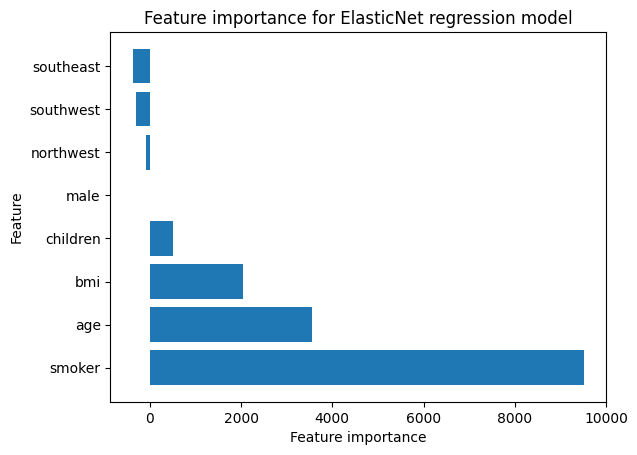

In [42]:
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature importance for ElasticNet regression model')
plt.show()

## Random Forest Regressor

In [43]:
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
end = time.time()
r2 = rfr.score(X_test,Y_test)
print('Random Forest Regressor Accuracy =',r2)

Random Forest Regressor Accuracy = 0.8755340724752775


In [44]:
rfr_params = {'n_estimators':[1,10,50,100,150,200,250,300],
             'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 
             'max_features':['sqrt', 'log2', None],
             'n_jobs':[1,-1, None],
             'random_state':[2,4,6,8,10]}
start = time.time()
rfr_cv = GridSearchCV(rfr,rfr_params,cv=5,scoring='r2')
rfr_cv.fit(X_train, Y_train)
end = time.time()
print(f'Execution time: {end - start:.2f} seconds')
print("Best Parameters :",rfr_cv.best_params_)

Execution time: 3245.25 seconds
Best Parameters : {'criterion': 'absolute_error', 'max_features': 'log2', 'n_estimators': 150, 'n_jobs': 1, 'random_state': 4}


In [45]:
y_predict=rfr_cv.best_estimator_.predict(X_test)

print("Tuned Random Forest Regressor Model Accuracy:", 
     (r2_score(Y_test, y_predict)*100).round(2),'%')

Tuned Random Forest Regressor Model Accuracy: 89.81 %


# Conclusion

We have now built and tuned 5 different models to help us estimate medical insurance costs based on the factors given. All of the models gave satisfactory score but our best model has been the Random Forest Regressor which, after hyperparameter tuning, gave us a score of 89.81 %, almost 10 percentage points higher than our next highest model, a linear regression (80 %). 

In [48]:
y_predict=rfr_cv.best_estimator_.predict(X)
df['predicted charges'] = y_predict
df[['charges','predicted charges']]

,charges,predicted charges
0,16884.92400,17887.832197
1,1725.55230,5079.101581
2,4449.46200,5215.336419
3,21984.47061,13883.970892
4,3866.85520,4487.614491
...,...,...
1333,10600.54830,11505.352134
1334,2205.98080,2467.218312
1335,1629.83350,3582.355073
1336,2007.94500,2204.462364


<AxesSubplot: xlabel='charges', ylabel='predicted charges'>

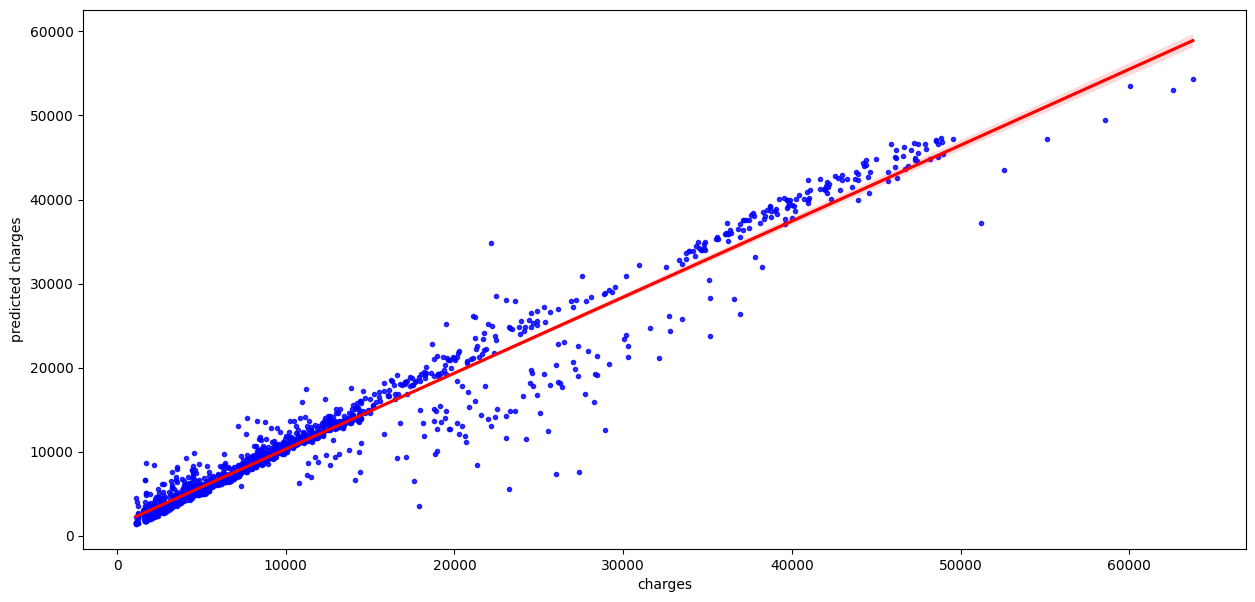

In [53]:
plt.figure(figsize=(15,7),)
sns.regplot(y=df['predicted charges'], x=df['charges'],marker='.',fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})